EDA findings

- Only 0.16125 of respondants were given a label of 3 or higher. 

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math


In [ ]:

train = pd.read_csv('../data/baseline.csv')
label_counts = train['Label'].value_counts()
predicted_labels = train['Prediction'].value_counts()

combined_counts = pd.DataFrame({
    'Label': label_counts,
    'Prediction': predicted_labels
}).fillna(0)

combined_counts['Label'] = combined_counts['Label'] / combined_counts['Label'].sum()
combined_counts['Prediction'] = combined_counts['Prediction'] / combined_counts['Prediction'].sum()

ax = combined_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Labels')
plt.ylabel('Probability')
plt.title('Label and Prediction Probabilities')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


{1: 0.355, 2: 0.48375, 3: 0.0975, 4: 0.0575, 5: 0.00625}


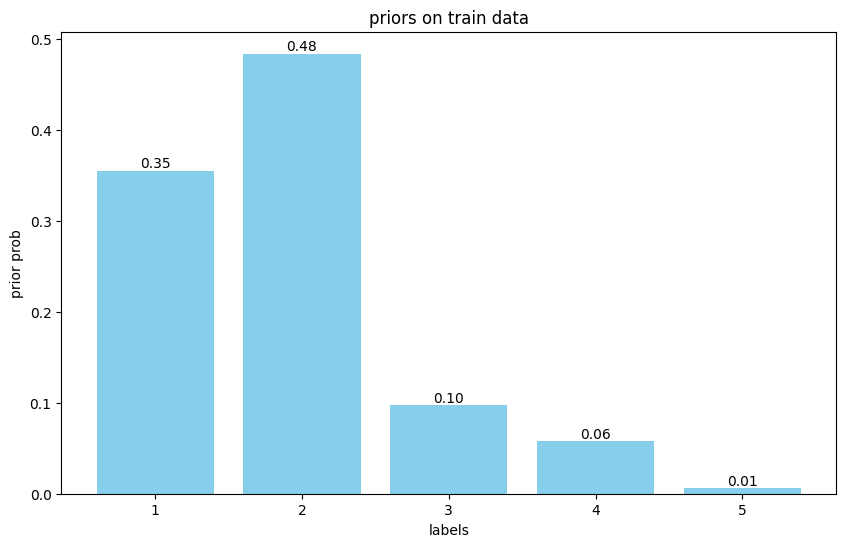

In [10]:
train = pd.read_csv('../data/baseline.csv')
label_counts = train['Label'].value_counts()
counts = label_counts.to_dict()

# create a prior
total = sum(counts.values())
prior = {label: count / total for label, count in sorted(counts.items(), key=lambda item: item[0])}
print(prior)

# visualize the prior
labels = list(prior.keys())
values = list(prior.values())

def plot_vals(labels, values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='skyblue')
    plt.xlabel('labels')
    plt.ylabel('prior prob')
    plt.title('priors on train data')

    # label the bars with the probabilities
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')
        
    return plt

plot_vals(labels, values).show()

In [21]:
mismatched_rows = train[train['Label'] != train['Prediction']][['Input Text','Label', 'Prediction']].sort_values(by='Label', ascending=True)

print("Mismatched Rows:")
mismatched_rows.head(20)

mismatched_rows.to_csv('../data/mismatched_rows.csv')


Mismatched Rows:


In [22]:
label_1_entries = train[train['Label'] == 1]
print("Entries with Label 1:")
print(label_1_entries)

label_1_entries.to_csv('../data/label_1_entries.csv', index=False)


Entries with Label 1:
     Unnamed: 0.1  Unnamed: 0  \
4               4           4   
5               5           5   
6               6           6   
10             10          10   
11             11          11   
..            ...         ...   
791           791         791   
792           792         792   
794           794         794   
795           795         795   
798           798         798   

                                            Input Text  Label  \
4    Interviewer: Thanks for taking the time to int...      1   
5    Interviewer: It seems like you were about to p...      1   
6    Interviewer: Great! I see from your applicatio...      1   
10   Interviewer: Certainly. When you were incorpor...      1   
11   Interviewer: Thanks for taking the time to int...      1   
..                                                 ...    ...   
791  Interviewer: I understand, no problem. Let's p...      1   
792  Interviewer: Navigating the complexity of defi...      1

In [28]:
label_1_entries["Response"]

4                                                    NaN
5                                      a custom callback
6      So I have worked on many projects where I have...
10     Actually at that time it was actually three ye...
11                                                   NaN
                             ...                        
791    In deep learning is an upgraded version of mac...
792    A defining a defining a particular API route f...
794    Eh. And I would like to recall for any give me...
795                                                  NaN
798    So like whenever we have any error, like we ca...
Name: Response, Length: 284, dtype: object

In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math
from tagger import Tagger

labelled = pd.read_csv('../data/baseline.csv')
# small_labelled = labelled[:130]
tagger = Tagger()
res = tagger.apply_function_to_df(labelled, tagger.llm_valid_response, col_name="Valid")

In [12]:
count = 1
for text in res[(res["Valid"] == True) & (res["Label"] == 1)]["Response"]:
    print(text)
    print(count)
    count+=1

a custom callback
1
So I have worked on many projects where I have used python so you can in my resume you can see my Publications. So all of my Publications the code I wrote was in Python and in technical projects also, you can see three projects and all the three projects are implemented in Python long language and for for practicing data structures and algorithms and for participating in competitive programming I C plus plus has my language for coding. So you see plus plus for combative programming and python for development of applications.
2
Actually at that time it was actually three years ago. My internship was a three years ago. So at that time we didn't have and we were at a very base level of startup. So we didn't have like the much more data to like evaluate or two filter out the noise from so we had a very compact data and we had to use all the data actually and it was select the data selected by the human experts so we didn't have to worry about the noise actually. So that

In [13]:
valid1s = res[(res["Valid"] == True) & (res["Label"] == 1)]
valid3s = res[(res["Valid"] == True) & (res["Label"] == 3)]
invalid1s = res[(res["Valid"] == False) & (res["Label"] == 1)]
invalid3s = res[(res["Valid"] == False) & (res["Label"] == 3)]

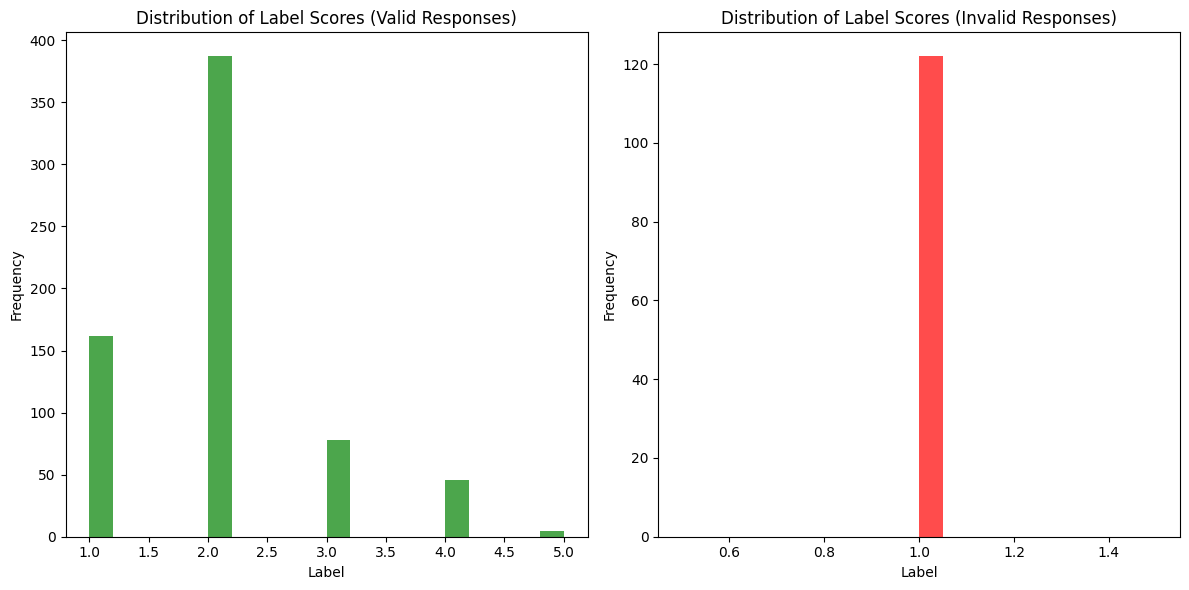

In [24]:
# Visualize the distribution of the "Label" scores for the entries with "Valid" as False vs. those with "Valid" as True

# Filter the data
valid_res = res[res["Valid"] == True]
invalid_res = res[res["Valid"] == False]

# Plot the distributions
plt.figure(figsize=(12, 6))

# Plot for valid responses
plt.subplot(1, 2, 1)
plt.hist(valid_res["Label"], bins=20, color='g', alpha=0.7)
plt.title('Distribution of Label Scores (Valid Responses)')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Plot for invalid responses
plt.subplot(1, 2, 2)
plt.hist(invalid_res["Label"], bins=20, color='r', alpha=0.7)
plt.title('Distribution of Label Scores (Invalid Responses)')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [20]:
res.to_csv('../data/with_valid_classification.csv')